# Example: Regression
---------------------

This example shows how to use ATOM to apply pca on the data and run a regression pipeline.

Download the abalone dataset from [https://archive.ics.uci.edu/ml/datasets/Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone). The goal of this dataset is to predict the rings (age) of abalone shells from physical measurements.

### Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

In [2]:
# Load the data
X = pd.read_csv("./datasets/abalone.csv")

# Let's have a look
X.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [3]:
# Initialize atom for regression tasks
atom = ATOMRegressor(X, "Rings", verbose=2, random_state=42)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (4177, 9)
Memory: 509.72 kB
Scaled: False
Categorical features: 1 (12.5%)
Outlier values: 195 (0.6%)
-------------------------------------
Train set size: 3342
Test set size: 835



In [4]:
# Encode the categorical features
atom.encode()

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 classes.


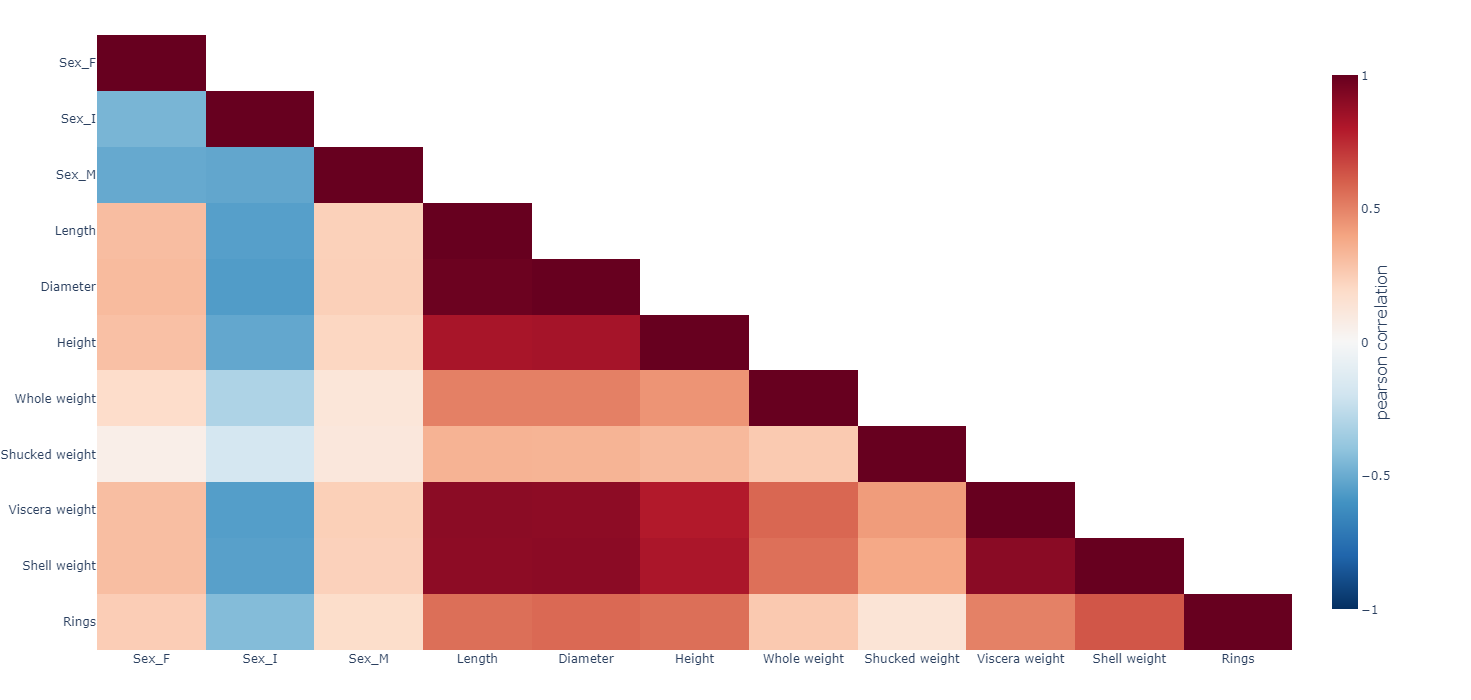

In [5]:
# Plot the dataset's correlation matrix
atom.plot_correlation()

In [6]:
# Apply pca for dimensionality reduction
atom.feature_selection(strategy="pca", n_features=6)

Fitting FeatureSelector...
Performing feature selection ...
 --> Applying Principal Component Analysis...
   --> Scaling features...
   --> Keeping 6 components.
   --> Explained variance ratio: 0.97


In [7]:
# Note that the fetaures are automatically renamed to pca0, pca1, etc...
atom.columns

Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'Rings'], dtype='object')

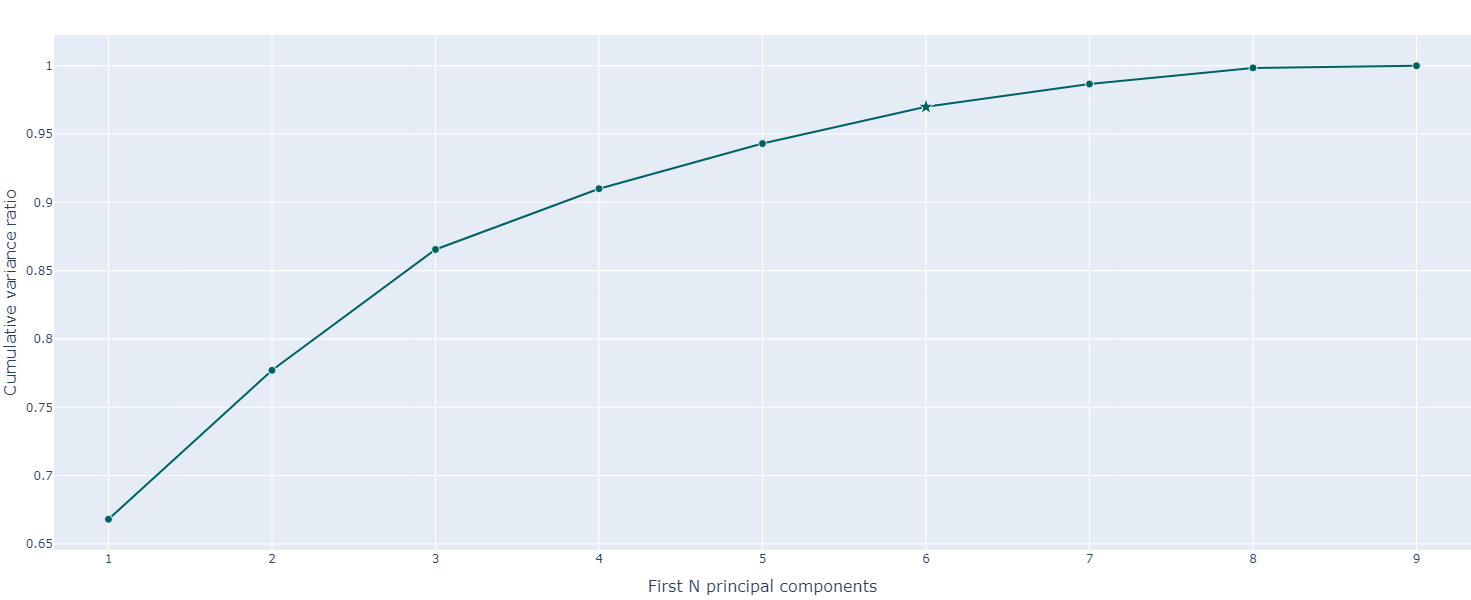

In [8]:
# Use the plotting methods to see the retained variance ratio
atom.plot_pca()

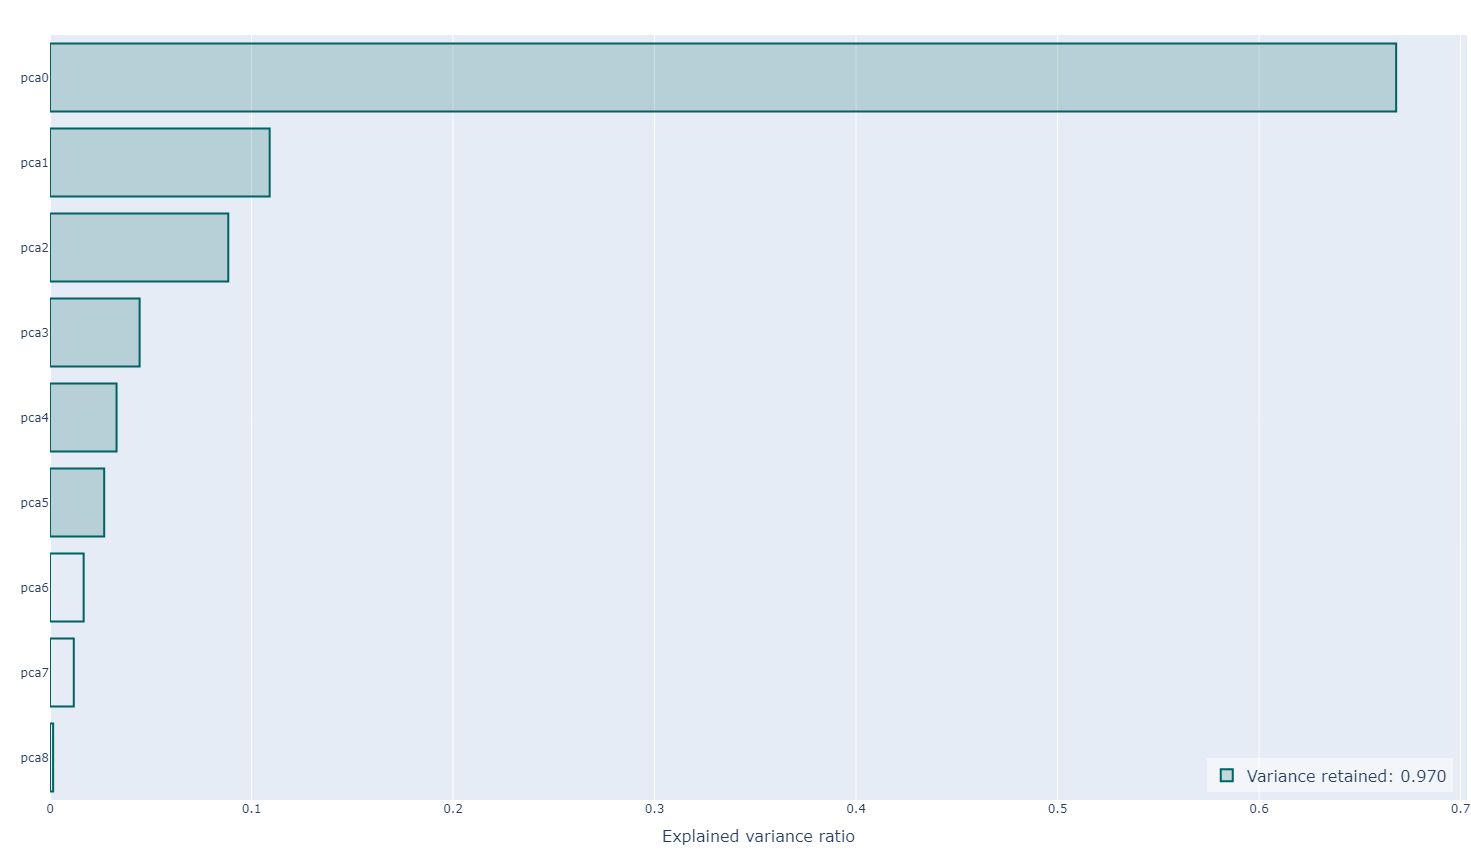

In [9]:
atom.plot_components()

### Run the pipeline

In [10]:
atom.run(
    models=["Tree", "Bag", "ET"],
    metric="mse",
    n_trials=5,
    n_bootstrap=5,
)


Training ========================= >>
Models: Tree, Bag, ET
Metric: neg_mean_squared_error


Running hyperparameter tuning for DecisionTree...
| trial |   criterion | splitter | max_depth | min_samples_split | min_samples_leaf | max_features | ccp_alpha | neg_mean_squared_error | best_neg_mean_squared_error | time_trial | time_ht |    state |
| ----- | ----------- | -------- | --------- | ----------------- | ---------------- | ------------ | --------- | ---------------------- | --------------------------- | ---------- | ------- | -------- |
| 0     | absolute_.. |     best |         5 |                 8 |               10 |         None |     0.035 |                -6.5456 |                     -6.5456 |     0.244s |  0.244s | COMPLETE |
| 1     | squared_e.. |     best |        10 |                 5 |                1 |          0.5 |      0.03 |                -7.1959 |                     -6.5456 |     0.060s |  0.304s | COMPLETE |
| 2     | absolute_.. |   random |        14 |  

### Analyze the results

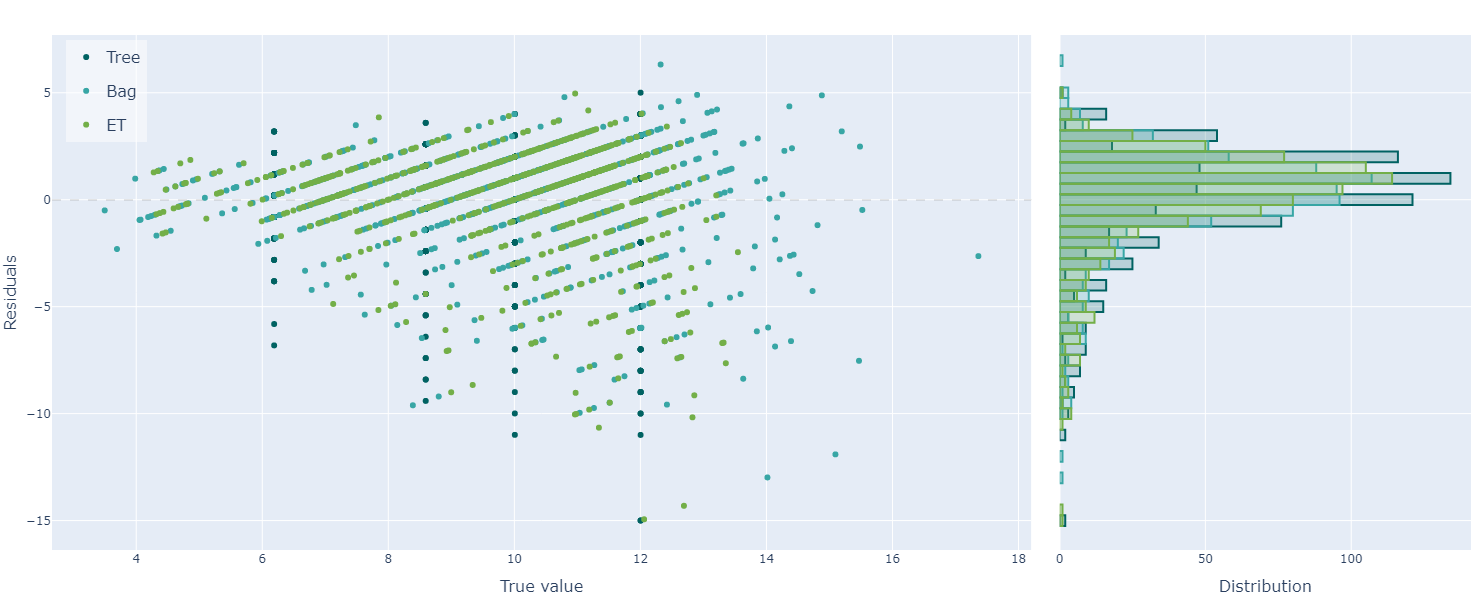

In [11]:
# Use the errors or residuals plots to check the model performances
atom.plot_residuals()

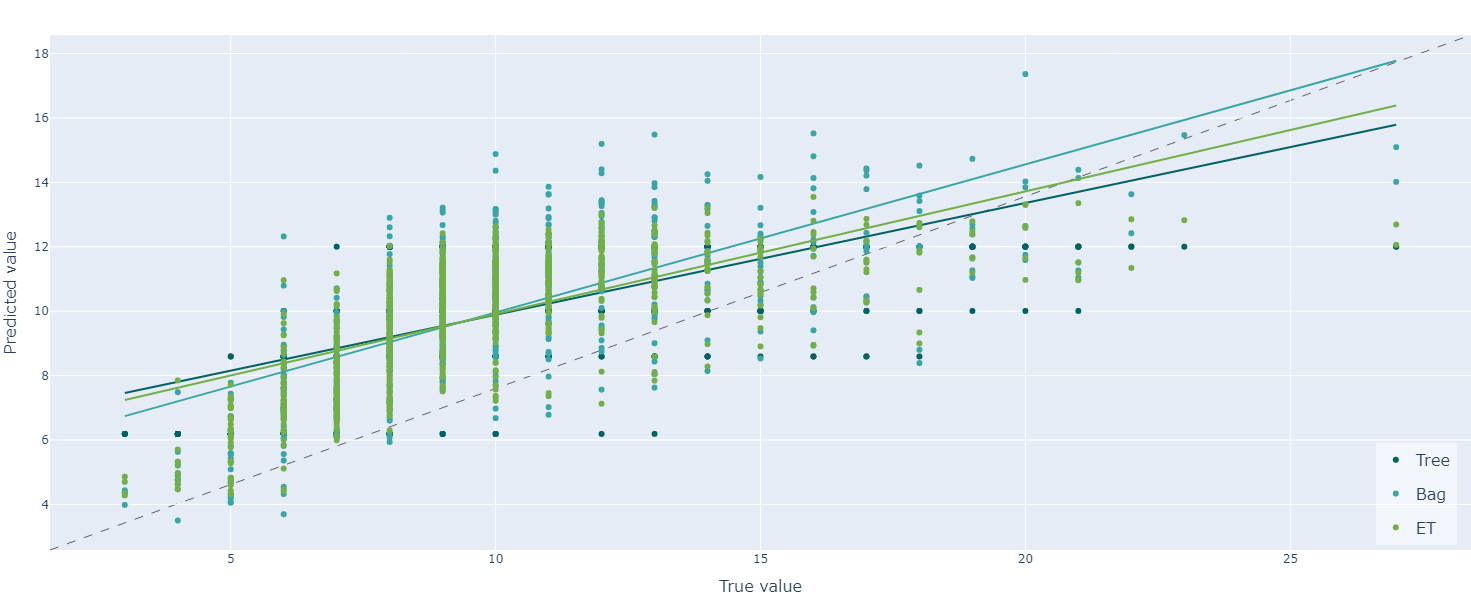

In [12]:
atom.plot_errors()

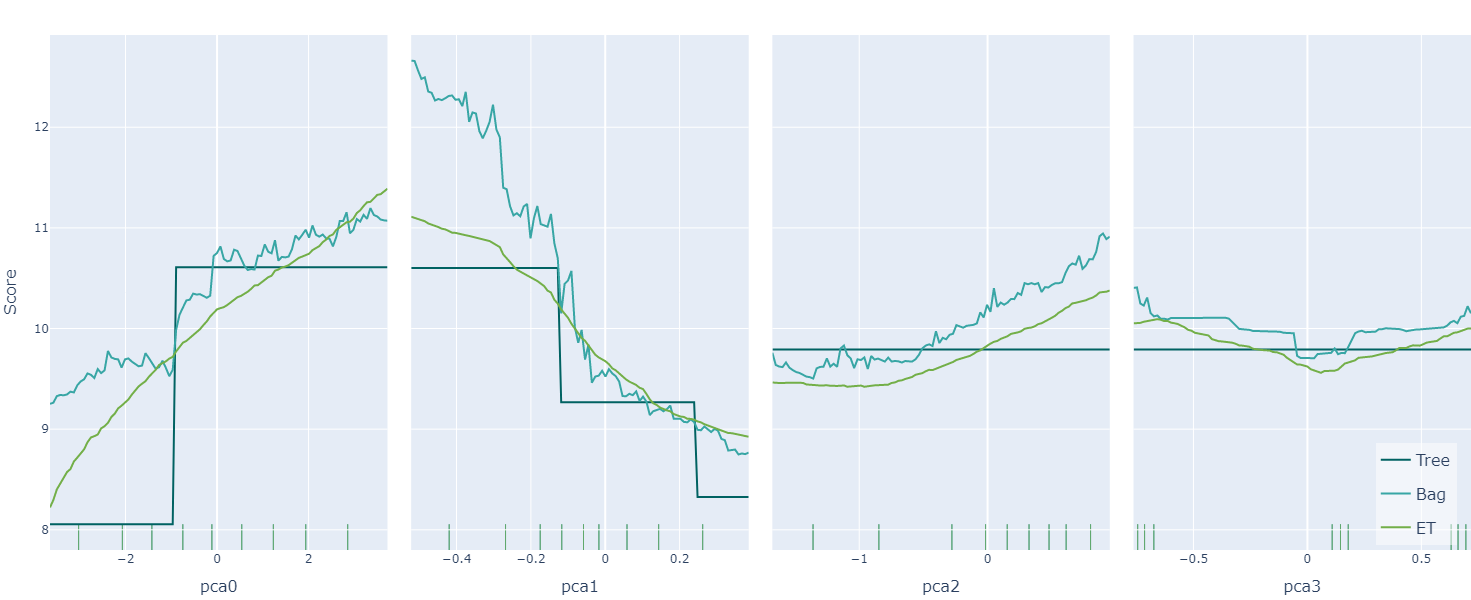

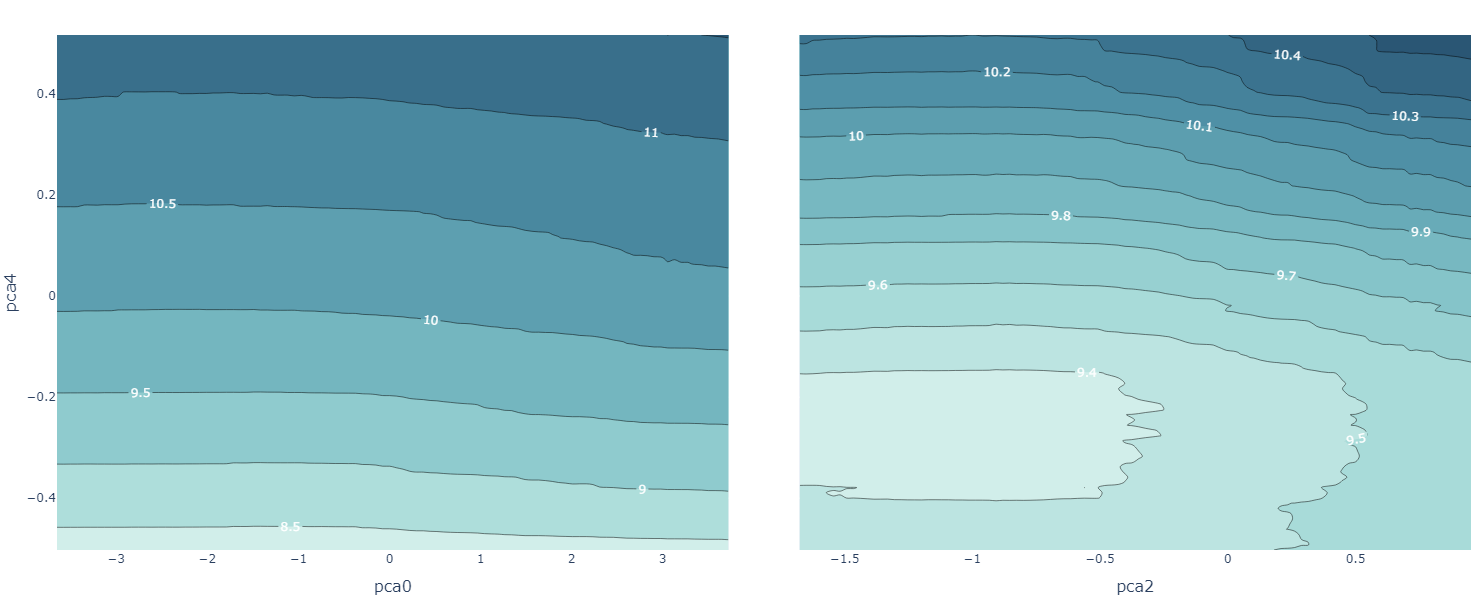

In [13]:
# Analyze the relation between the target response and the features
atom.n_jobs = 8  # The method can be slow...
atom.plot_partial_dependence(columns=(0, 1, 2, 3))
atom.ET.plot_partial_dependence(columns=(0, 2), pair=4)